In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [3]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation


In [4]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 
print(train_cats_dir)

# directory with our training dog pictures 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
print(validation_dogs_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/train/dogs
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [6]:
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [7]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [8]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False)

In [9]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [10]:
train_data_gen[0][0].shape

(16, 256, 256, 3)

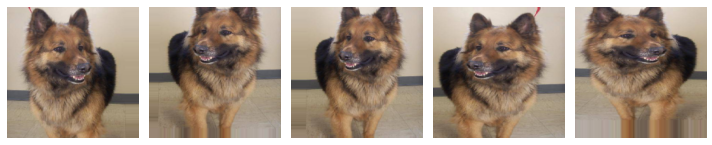

In [11]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [12]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [13]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


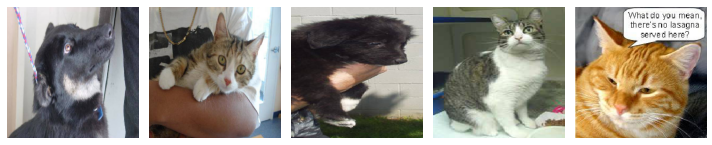

In [14]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [15]:
_[:5] # 정답 데이터

array([1., 0., 1., 0., 0.], dtype=float32)

# 문제1-1. 이미지에 나온 VGG16 모델을 구현하세요 

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

input_layer=tf.keras.layers.Input(shape=(256, 256, 3))
x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1024, activation='relu')(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      36928 

In [17]:
import tensorflow as tf

# 손실 함수 설정
loss_function = tf.keras.losses.binary_crossentropy

# Optimizer 설정
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Metric 설정
metric = tf.keras.metrics.BinaryAccuracy(name='binary_accuracy')

# 모델 컴파일
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=[metric])

In [18]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/5
125/125 [==============================] - 39s 266ms/step - loss: 59.9462 - binary_accuracy: 0.5250 - val_loss: 0.8078 - val_binary_accuracy: 0.5190
Epoch 2/5
125/125 [==============================] - 33s 260ms/step - loss: 0.7352 - binary_accuracy: 0.5265 - val_loss: 0.6866 - val_binary_accuracy: 0.5700
Epoch 3/5
125/125 [==============================] - 33s 262ms/step - loss: 0.7023 - binary_accuracy: 0.5280 - val_loss: 0.6798 - val_binary_accuracy: 0.5750
Epoch 4/5
125/125 [==============================] - 32s 256ms/step - loss: 0.6895 - binary_accuracy: 0.5370 - val_loss: 0.6802 - val_binary_accuracy: 0.5550
Epoch 5/5
125/125 [==============================] - 32s 256ms/step - loss: 0.6858 - binary_accuracy: 0.5330 - val_loss: 0.6829 - val_binary_accuracy: 0.5730


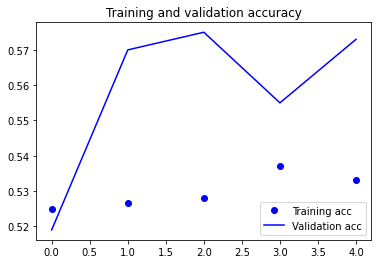

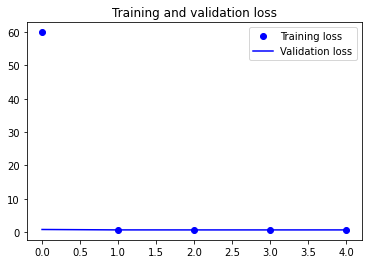

In [19]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 문제 1-2. 다양한 방법을 사용하여 모델의 성능 올리기

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.regularizers import l2

# 하이퍼파라미터 설정
hyperparameters = {
    'image_size': (224, 224),
    'batch_size': 32,
    'learning_rate': 0.001,
    'dropout_rate': 0.5,
    'l2_regularization': 0.01,
    'rotation_range': 20,
    'width_shift_range': 0.2,
    'height_shift_range': 0.2,
    'shear_range': 0.2,
    'zoom_range': 0.2,
    'horizontal_flip': True,
    'fill_mode': 'nearest'
}

In [35]:
def create_transfer_learning_model(input_shape, dropout_rate, l2_reg):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    
    for layer in base_model.layers:
        layer.trainable = False
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=base_model.input, outputs=outputs)
    return model

# 모델 생성
model = create_transfer_learning_model(
    input_shape=(*hyperparameters['image_size'], 3),
    dropout_rate=hyperparameters['dropout_rate'],
    l2_reg=hyperparameters['l2_regularization']
)

58900480/58889256 [==============================] - 0s 0us/step


In [36]:
# Loss function, Optimizer, Metrics 설정
loss_function = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate'])
metrics = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.AUC(name='auc'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

In [37]:
# 모델 컴파일
model.compile(
    loss=loss_function,
    optimizer=optimizer,
    metrics=metrics
)

In [38]:
# 모델 요약
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [40]:
# 모델 학습
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/5
62/62 [==============================] - 29s 375ms/step - loss: 4.5810 - accuracy: 0.5714 - auc: 0.5971 - precision: 0.5749 - recall: 0.5680 - val_loss: 2.0243 - val_accuracy: 0.6830 - val_auc: 0.8686 - val_precision: 0.6231 - val_recall: 0.9260
Epoch 2/5
62/62 [==============================] - 20s 326ms/step - loss: 1.5055 - accuracy: 0.6835 - auc: 0.7563 - precision: 0.6757 - recall: 0.6632 - val_loss: 1.2055 - val_accuracy: 0.6620 - val_auc: 0.9115 - val_precision: 0.9880 - val_recall: 0.3280
Epoch 3/5
62/62 [==============================] - 20s 324ms/step - loss: 1.0391 - accuracy: 0.7431 - auc: 0.8193 - precision: 0.7532 - recall: 0.7123 - val_loss: 0.8254 - val_accuracy: 0.8560 - val_auc: 0.9329 - val_precision: 0.9064 - val_recall: 0.7940
Epoch 4/5
62/62 [==============================] - 20s 322ms/step - loss: 0.8582 - accuracy: 0.7639 - auc: 0.8523 - precision: 0.7691 - recall: 0.7475 - val_loss: 0.6880 - val_accuracy: 0.8680 - val_auc: 0.9463 - val_precision: 0.93

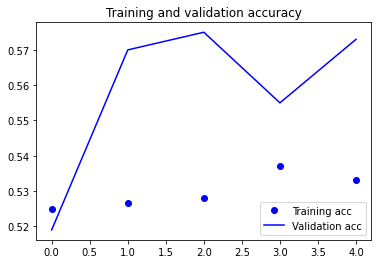

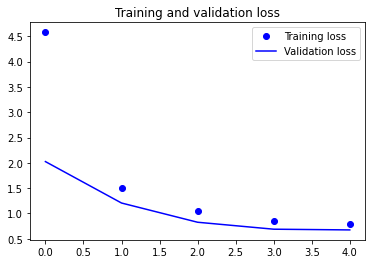

In [43]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 문제 2-1. 다른 이미지 테스트해보기

In [44]:
!pip3 install tensorflow-estimator==2.6.0

     |████████████████████████████████| 462 kB 5.7 MB/s            
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.4 which is incompatible.
tensorflow-gpu 2.6.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow-gpu 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.0.1 which is incompatible.


In [45]:
# Tensorflow와 Tensoflow Hub에 있는 이미 학습된 모델을 활용하기 위한 모듈 
import tensorflow as tf
import tensorflow_hub as hub

# 이미지를 다운로드하는 데에 사용하는 모듈
import matplotlib.pyplot as plt
import tempfile 
from six.moves.urllib.request import urlopen
from six import BytesIO

# 이미지에 선과 폰트를 넣기 위한 모듈
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# Detection하는 데에 소요된 시간을 점검하기 위한 모듈
import time

In [46]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

In [47]:
def download_and_resize_image(url, new_width=256, new_height=256, display=False): 
  
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)  # 이미지 읽기
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) # 이미지 조정
  pil_image_rgb = pil_image.convert("RGB") #RBG로 변환
  pil_image_rgb.save(filename, format="JPEG", quality=90) # 이미지 저장
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

In [48]:
def draw_bounding_box_on_image(image, 
                               ymin, xmin, ymax, xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)

# BBox 테두리 그리기
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin

In [49]:
# BBox 그리기
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1): 
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

# BBox 그리기 적용
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])  # 박스 좌표값
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

Image downloaded to /tmp/tmp2selp3q_.jpg.


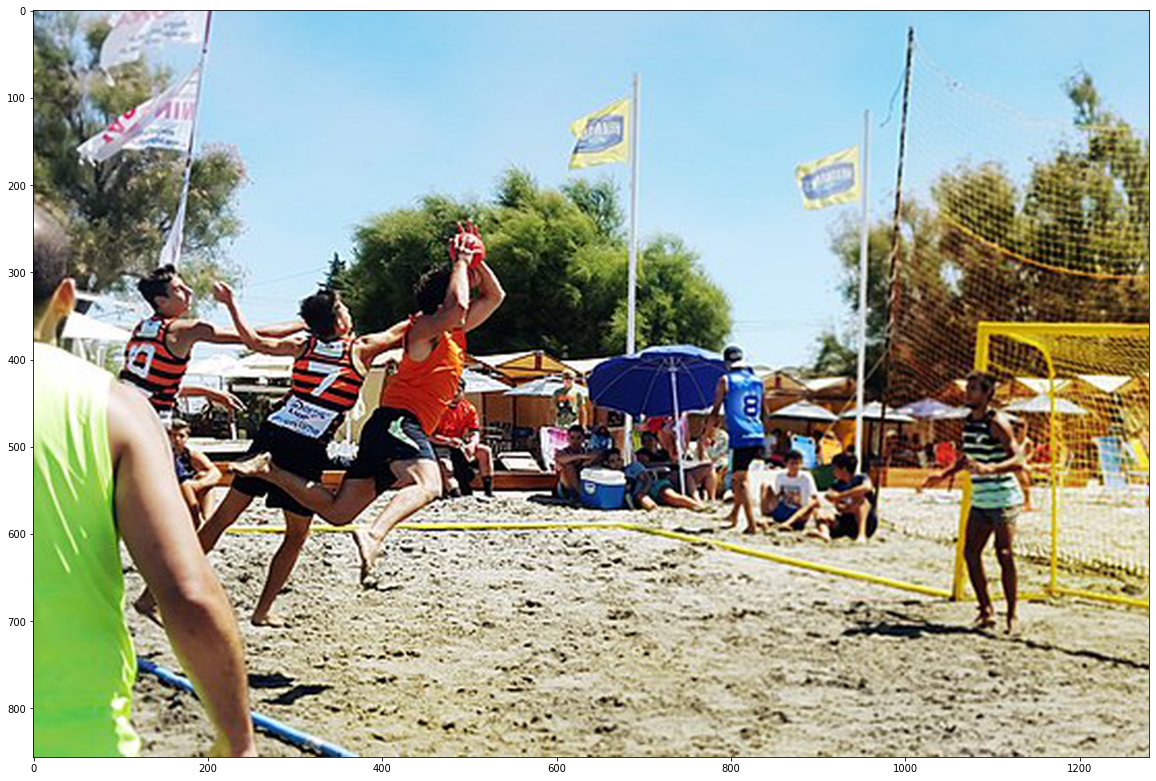

In [50]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Torneo_beach_handball.jpg/640px-Torneo_beach_handball.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)  # new_width와 new_height를 변경해 보세요.

In [51]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"  

detector = hub.load(module_handle).signatures['default'] # detector에 사용할 모듈 저장

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [52]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [53]:
def run_detector(detector, path):
  img = load_img(path) 

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

# 소요시간 측정
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

# 이미지 추론 개수와 추론 시간 출력
  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

# 이미지 내 박스로 entity, scores를 추가하여 출력
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

Found 100 objects.
Inference time:  39.75998377799988


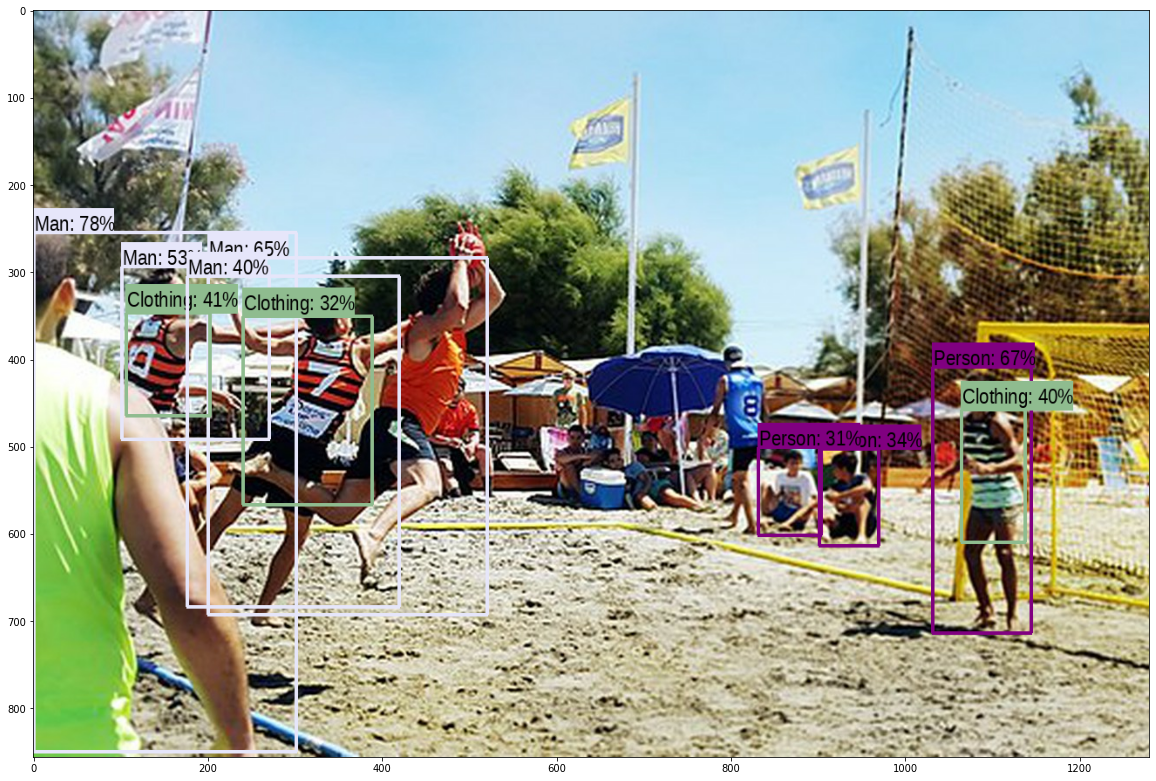

In [54]:
run_detector(detector, downloaded_image_path)

# 문제 2-1. 다른 이미지 테스트해보기

In [59]:
import requests
from PIL import Image
import numpy as np
from io import BytesIO

def load_and_preprocess_image(image_url, target_size=(224, 224)):
    # 이미지 다운로드
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    
    # 이미지 크기 조정
    img = img.resize(target_size)
    
    # 이미지를 numpy 배열로 변환
    img_array = np.array(img)
    
    # RGB 이미지가 아닌 경우 RGB로 변환
    if len(img_array.shape) == 2:
        img_array = np.stack((img_array,)*3, axis=-1)
    elif img_array.shape[2] == 4:
        img_array = img_array[:,:,:3]
    
    # 이미지 정규화 (0-1 범위로)
    img_array = img_array.astype(np.float32) / 255.0
    
    return img_array

def test_image_loading(image_url):
    try:
        # 이미지 불러오기 및 전처리
        img_array = load_and_preprocess_image(image_url)
        
        # 이미지 정보 출력
        print(f"이미지 크기: {img_array.shape}")
        print(f"이미지 데이터 타입: {img_array.dtype}")
        print(f"이미지 최소값: {img_array.min()}")
        print(f"이미지 최대값: {img_array.max()}")
        
        # 이미지 불러오기 성공 메시지
        print("이미지를 성공적으로 불러왔습니다!")
        
    except Exception as e:
        print(f"이미지를 불러오는 중 오류가 발생했습니다: {str(e)}")

# 이미지 URL 설정
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Henry_Espinoza_Panta_smashing_a_wave_at_Lobitos.jpg/1920px-Henry_Espinoza_Panta_smashing_a_wave_at_Lobitos.jpg"

# 테스트 실행
test_image_loading(image_url)

이미지 크기: (224, 224, 3)
이미지 데이터 타입: float32
이미지 최소값: 0.019607843831181526
이미지 최대값: 1.0
이미지를 성공적으로 불러왔습니다!


# 문제 2-2. 다양한 pre-trained model 테스트해보기

Faster R-CNN 모델 로딩 중...
Faster R-CNN 모델 로딩 완료! (소요 시간: 11.13초)
이미지 처리 중...
이미지 처리 완료!
객체 감지 수행 중...
객체 감지 완료! (소요 시간: 5.89초)
결과 시각화 중...


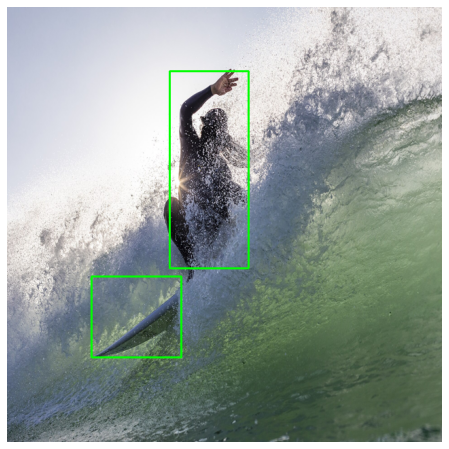

결과 시각화 완료!

감지된 객체:
객체 1: 1.0, 신뢰도: 0.99
객체 2: 42.0, 신뢰도: 0.95

1번째 모델인 SSD MobileNet V2는 주로 빠르지만 정확성이 다소 낮을 수 있습니다.
2번째 모델인 Faster R-CNN은 더 높은 정확도를 제공하지만, 속도가 조금 더 느릴 수 있습니다. (로딩 시간: 11.13초, 감지 시간: 5.89초)


In [63]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO
import time

# 모델 불러오기
def load_model(model_url):
    model = hub.load(model_url)
    return model

# 이미지 전처리
def preprocess_image(image_url, target_size=(640, 640)):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# 객체 감지 수행
def detect_objects(model, img_array):
    results = model(img_array)
    return {key: value.numpy() for key, value in results.items()}

# 결과 시각화
def visualize_results(img_array, results):
    img = np.squeeze(img_array)
    for i in range(int(results['num_detections'][0])):
        if results['detection_scores'][0][i] > 0.5:
            ymin, xmin, ymax, xmax = results['detection_boxes'][0][i]
            (left, right, top, bottom) = (xmin * img.shape[1], xmax * img.shape[1],
                                          ymin * img.shape[0], ymax * img.shape[0])
            cv2.rectangle(img, (int(left), int(top)), (int(right), int(bottom)), (0, 255, 0), 2)

    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# 메인 테스트 함수
def test_object_detection(model_url, model_name):
    print(f"{model_name} 모델 로딩 중...")
    start_time = time.time()
    model = load_model(model_url)
    load_time = time.time() - start_time
    print(f"{model_name} 모델 로딩 완료! (소요 시간: {load_time:.2f}초)")

    image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Henry_Espinoza_Panta_smashing_a_wave_at_Lobitos.jpg/1920px-Henry_Espinoza_Panta_smashing_a_wave_at_Lobitos.jpg"
    print("이미지 처리 중...")
    img_array = preprocess_image(image_url)
    print("이미지 처리 완료!")

    print("객체 감지 수행 중...")
    start_time = time.time()
    results = detect_objects(model, img_array)
    detection_time = time.time() - start_time
    print(f"객체 감지 완료! (소요 시간: {detection_time:.2f}초)")

    print("결과 시각화 중...")
    visualize_results(img_array, results)
    print("결과 시각화 완료!")

    print("\n감지된 객체:")
    for i in range(int(results['num_detections'][0])):
        if results['detection_scores'][0][i] > 0.5:
            print(f"객체 {i+1}: {results['detection_classes'][0][i]}, 신뢰도: {results['detection_scores'][0][i]:.2f}")

    return load_time, detection_time

# Faster R-CNN 모델 테스트
faster_rcnn_url = "https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1"
faster_rcnn_load_time, faster_rcnn_detection_time = test_object_detection(faster_rcnn_url, "Faster R-CNN")

print("\n1번째 모델인 SSD MobileNet V2는 주로 빠르지만 정확성이 다소 낮을 수 있습니다.")
print(f"2번째 모델인 Faster R-CNN은 더 높은 정확도를 제공하지만, 속도가 조금 더 느릴 수 있습니다. (로딩 시간: {faster_rcnn_load_time:.2f}초, 감지 시간: {faster_rcnn_detection_time:.2f}초)")